In [ ]:
#general
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy import optimize
from scipy.optimize import root_scalar
from scipy import integrate
from scipy.misc import derivative
from scipy.integrate import quad

#Curve Fit
from scipy.optimize import root_scalar
from scipy import interpolate
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

#for importing data
import pandas as pd
from google.colab import files
import io
import csv
import numpy as np


In [ ]:
# we import CSV raw data by this

# ### in csv, there should be no x axis information, ### 
# First iteration only Warmup to 25%
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['0_to_25_data.csv']))

Saving 0_to_25_data.csv to 0_to_25_data (2).csv


In [ ]:
# Text file data converted 
# https://www.pythonpool.com/numpy-read-csv/#:~:text=We%20can%20use%20a%20dataframe,function%20from%20the%20pandas'%20library. 

data = np.loadtxt("0_to_25_data.csv", dtype=int)
print(data)

[ 92  96 101 106 109 109 110 112 115 118 120 121 125 127 131 132 134 135
 136 138 139 141 144 146 147 148 149 149 149 150 152 155 157 157 157 157
 157 158 160 159 159 161 162 163 166 169 174 176 177 181 182 182 183 184
 185 185 186 185 186 187 188 188 188 188 187 186 180 174 172 176 179 179
 179 179 178 178 176 176 175 175 175 174 173 172 171 171 171 171 173 173
 173 174 174 175 176 176 176 176 177 178 179 179 178 177 175 175 174 176
 177 178 178 178 177 177 177 177 177 177 176 175 174 172 171 170 169 168
 166 165 164 163 164 164 162 158 155 152 150 156 160 162 165 167 169 172
 174 176 179 180 181 184 186 188 189 189 190 193 193 194 197 199 200 202
 205 206 207 208 210 210 210 210 212 212 212 213 213 214 215 214 214 215
 215 215 215 215 216 217 217 217 216 216 216 215 215 216 216 216 217 219
 220 220 220 220 220 220 220 219 218 217 217 217 217 216 215 214 214 213
 214 213 213 213 212 211 212 211 211 210 210 209 209 209 208 208 208 208
 208 207 207 206 206 206 206 206 206 206 206 205 20

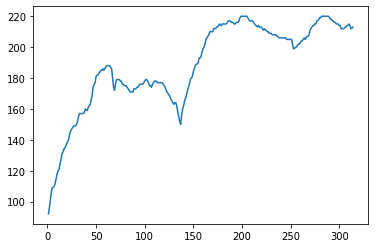

In [ ]:
t = np.linspace(1,314,314)

plt.plot(t,data)
p = np.polyfit(t,data,3)

<ipython-input-54-45e7cc951432>:6: RuntimeWarning: divide by zero encountered in log
  return a*np.log(x) + b


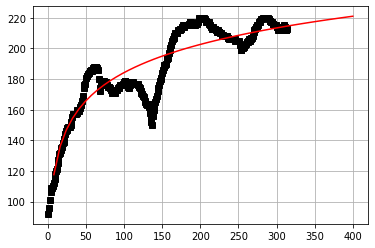

In [ ]:
#Fitting function applied to Warmup - 25%

time_warmup_25 = np.linspace(1,314,314)
#logarithmic growth
def fitfun(x,a,b):
  return a*np.log(x) + b

#Through this curve fit, we can get the convergance value
popt, pcov = curve_fit(fitfun, time_warmup_25, data[:314])

#Graph the fit
x_fit = np.linspace(0,400)
plt.plot(t, data, 'ks', label = 'data')
plt.plot(x_fit, fitfun(x_fit,*popt), '-r', label = 'cubic')
plt.grid()


<ipython-input-54-45e7cc951432>:6: RuntimeWarning: divide by zero encountered in log
  return a*np.log(x) + b


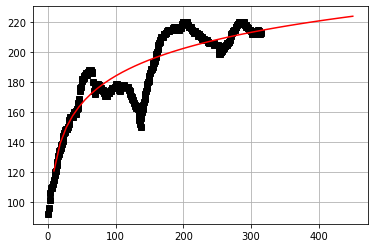

In [ ]:
#Extrapolate by large amount to find convergence value

x_fit = np.linspace(0,450)
plt.plot(t, data, 'ks', label = 'data')
plt.plot(x_fit, fitfun(x_fit,*popt), '-r', label = 'cubic')
plt.grid()

In [ ]:
fitfun(450, popt[0], popt[1])

224.14763436859883

In [ ]:
#Now repeat for CSV file containing only 25% to 50% data

In [ ]:
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['25_to_50_data.csv']))

Saving 25_to_50_data.csv to 25_to_50_data (3).csv


In [ ]:
data = np.loadtxt("25_to_50_data.csv", dtype=int)
print(data)

[215 216 217 218 219 220 221 222 223 224 226 227 229 231 232 234 235 236
 236 236 236 236 237 237 239 239 240 240 241 241 241 241 241 241 240 235
 235 236 230 232 232 234 235 236 237 239 241 240 235 235 236 239 243 244
 245 248 250 251 252 255 257 259 261 264 266 266 268 270 272 272 272 273
 274 275 276 277 277 278 279 280 280 280 280 280]


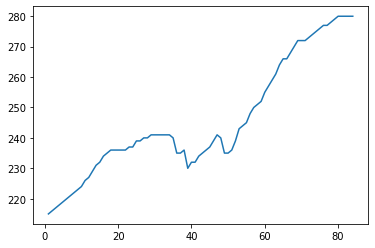

In [ ]:
t = np.linspace(1,84,84)

plt.plot(t,data)
p = np.polyfit(t,data,3)

<ipython-input-68-ef09e9b7ecd0>:6: RuntimeWarning: divide by zero encountered in log
  return a*np.log(x) + b


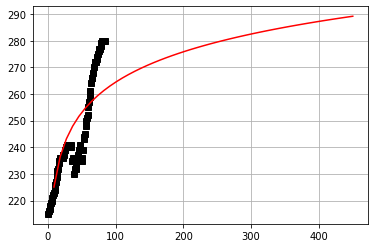

In [ ]:
#Fitting function applied to 25% - 50%

time_25_50 = np.linspace(1,84,84)
#logarithmic growth
def fitfun(x,a,b):
  return a*np.log(x) + b

#Through this curve fit, we can get the convergance value
popt, pcov = curve_fit(fitfun, time_25_50, data[:84])

#Graph the fit function
x_fit = np.linspace(0,450)
plt.plot(t, data, 'ks', label = 'data')
plt.plot(x_fit, fitfun(x_fit,*popt), '-r', label = 'cubic')
plt.grid()

In [ ]:
fitfun(450, popt[0], popt[1])

289.16958397559455

Temperature increase between ventilation levels seems to degrade by 50% for each 1/4 increase in ventilation: 

50% open Peak temperature is 289 Degrees, 25% open Peak temperature is 224 Degrees, Starting temperature is 94 Degrees: 

$224 - 94 = 130$ degree increase


$289 - 224 = 65$ degree increase

Therefore, we can assume that the increase in temperature at 75% ventilation should be approximately:

$289 + \frac{65}{2} = 321.5$ Degrees

Subsequently we can determine the temperature at 100% to be approximately:

$321.5 +\frac{32.5}{2} = 354$ Degrees



We will then fit a curve to these four peak temperatures to plot the relationship between temperature and ventilation.

331.95126857142856


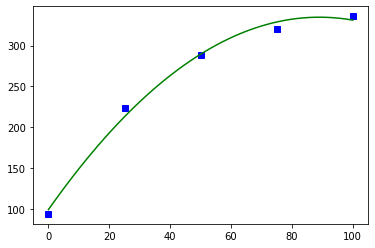

In [ ]:
xdata = np.array([0, 25, 50, 75, 100])
ydata = np.array([94, 224, 288, 320, 336]) 
p = np.polyfit(xdata,ydata,2)

# evaluate the polynomial for a given x value
x = 79.2
y = np.polyval(p, x)
print(y)

x = np.linspace(0,100)
y = np.polyval(p, x)

plt.plot(xdata,ydata,'bs')
plt.plot(x,y,'g-')
plt.show()